In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("daily-total-female-births-CA.csv", header = 0)

In [3]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [5]:
df.columns

Index(['date', 'births'], dtype='object')

In [6]:
df.date.dtype

dtype('O')

In [7]:
df2 = df = pd.read_csv("daily-total-female-births-CA.csv", header = 0, parse_dates=[0])

In [8]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [9]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='births', ylabel='count'>

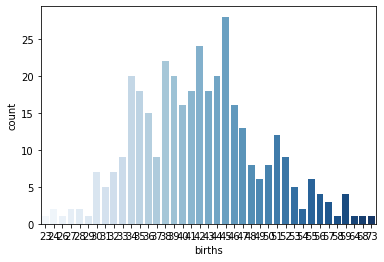

In [10]:
sns.countplot(x = df2["births"], data = df2, palette="Blues")

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


<AxesSubplot:>

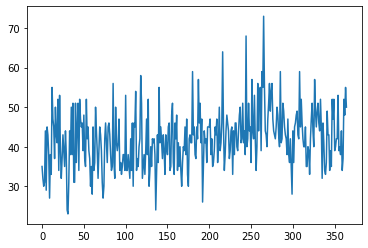

In [12]:
df2["births"].plot()

In [13]:
dataviz_of = df2.copy()

In [14]:
dataviz_of.index = dataviz_of["date"]

In [15]:
dataviz_of.head()

,date,births
date,,
1959-01-01,1959-01-01,35
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44


In [16]:
dataviz_of2 = dataviz_of[(dataviz_of["date"] > "1959-01-01") & (dataviz_of["date"] <= "1959-01-10")].copy()

In [17]:
dataviz_of2.head(10)

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29
1959-01-07,1959-01-07,45
1959-01-08,1959-01-08,43
1959-01-09,1959-01-09,38
1959-01-10,1959-01-10,27


<AxesSubplot:xlabel='date'>

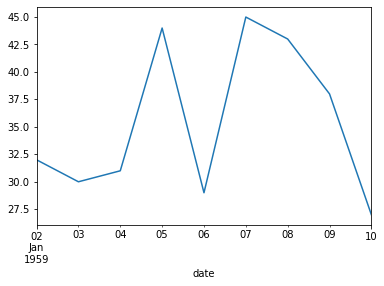

In [18]:
dataviz_of2["births"].plot()

## Trending Line

<AxesSubplot:ylabel='births'>

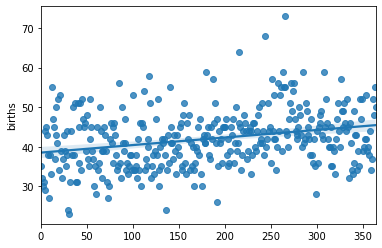

In [19]:
sns.regplot(x = df2.index.values, y = df2['births'])

<AxesSubplot:ylabel='births'>

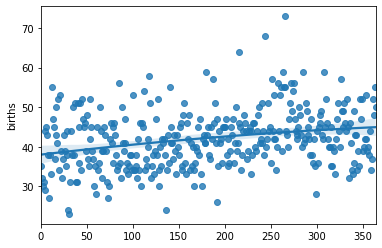

In [20]:
sns.regplot(x = df2.index.values, y = df2['births'], order=2)

In [21]:
miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates=[0])

In [22]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [23]:
miles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    96 non-null     datetime64[ns]
 1   MilesMM  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<AxesSubplot:>

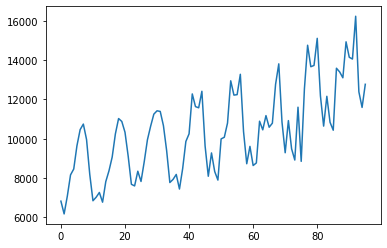

In [24]:
miles_df["MilesMM"].plot()

<AxesSubplot:ylabel='MilesMM'>

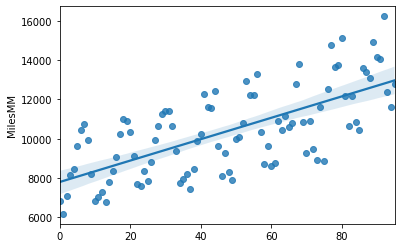

In [25]:
sns.regplot(x = miles_df.index.values, y = miles_df["MilesMM"], data = miles_df)

# Remove Seasonality

In [26]:
miles_df["year"] = miles_df["Month"].dt.year

In [27]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [28]:
groupy_mean= miles_df.groupby('year')["MilesMM"].mean()

<AxesSubplot:xlabel='year'>

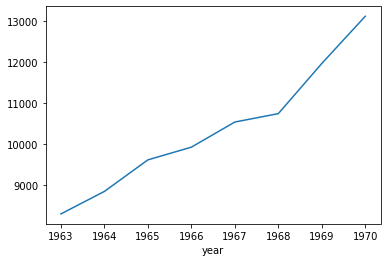

In [29]:
groupy_mean.plot()

## Creating Lag Values

In [30]:
miles_df.head()

,Month,MilesMM,year
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [31]:
miles_df["leg1"] = miles_df["MilesMM"].shift(1)

In [32]:
miles_df.head()

,Month,MilesMM,year,leg1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='leg1', ylabel='MilesMM'>

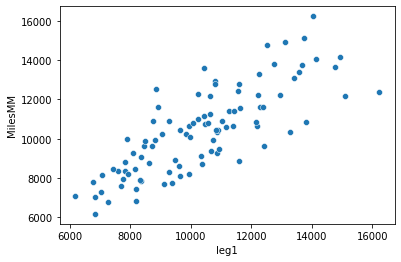

In [33]:
sns.scatterplot(x = miles_df["leg1"], y = miles_df["MilesMM"], data = miles_df)

<AxesSubplot:xlabel='leg1', ylabel='MilesMM'>

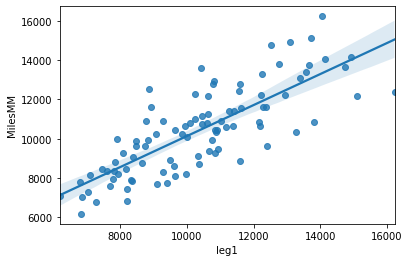

In [34]:
sns.regplot(x = miles_df["leg1"], y = miles_df["MilesMM"], data = miles_df)

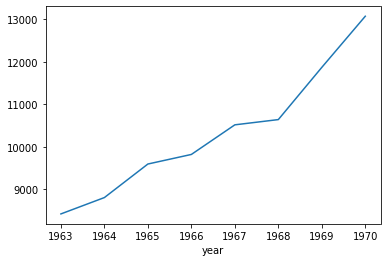

In [35]:
groupy_mean= miles_df.groupby('year')["leg1"].mean().plot()

In [36]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

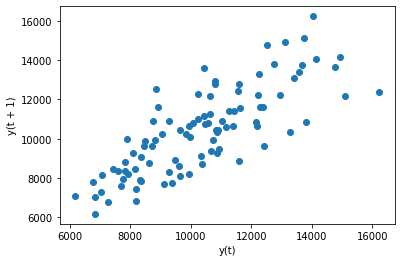

In [37]:
 lag_plot(miles_df["MilesMM"])

## AutoCorrelation Plot

In [38]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

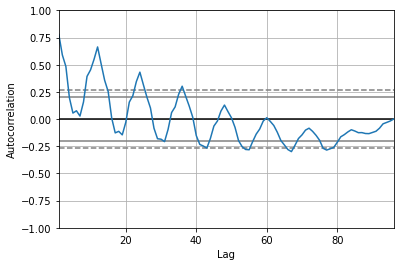

In [39]:
autocorrelation_plot(miles_df["MilesMM"])

In [40]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


# Time Series Forcasting 
### Date And Time Forcasting 
### Lag Forcasting 
### Window Forcasting 
### Expanding Forcasting 

In [41]:
features = df2.copy()

#  Date Time Forcasting 

In [42]:
features["year"] = df2["date"].dt.year

In [43]:
features["Months"] = df2.date.dt.month

In [44]:
features["Day"] = df2["date"].dt.day

In [45]:
features.head()

,date,births,year,Months,Day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5


# Lag Forcasting 

In [46]:
features["Lag1"] = df2["births"].shift(1)

In [47]:
features["Lag2"] = df2["births"].shift(365)

In [48]:
features.head(365)

,date,births,year,Months,Day,Lag1,Lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN
...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,34.0,NaN
361,1959-12-28,52,1959,12,28,37.0,NaN
362,1959-12-29,48,1959,12,29,52.0,NaN
363,1959-12-30,55,1959,12,30,48.0,NaN


# Window Features(Rolling Features)

In [49]:
features['Roll_Mean'] = features["births"].rolling(window=2).mean()

In [50]:
features["Roll_Max"] = features["births"].rolling(window=3).max()

In [51]:
features.head()

,date,births,year,Months,Day,Lag1,Lag2,Roll_Mean,Roll_Max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0


## Expanding Features

In [52]:
features["Expand_Max"] = df2["births"].expanding().max()

In [53]:
features.head()

,date,births,year,Months,Day,Lag1,Lag2,Roll_Mean,Roll_Max,Expand_Max
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,NaN,35.0
1,1959-01-02,32,1959,1,2,35.0,NaN,33.5,NaN,35.0
2,1959-01-03,30,1959,1,3,32.0,NaN,31.0,35.0,35.0
3,1959-01-04,31,1959,1,4,30.0,NaN,30.5,32.0,35.0
4,1959-01-05,44,1959,1,5,31.0,NaN,37.5,44.0,44.0


# Sampling
### 1> Upsampling 
### 2> Downsapling 

# Downsampling 
### Down sampling is also known as Decimation, reduces the sapmling Rate (Eg.Where you decrease the frequency of the samples, such as from days to months 

In [54]:
miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates=[0])

In [55]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [56]:
miles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    96 non-null     datetime64[ns]
 1   MilesMM  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [57]:
resample_miles_df = miles_df.resample('Q', on = 'Month').mean()

In [58]:
resample_miles_df.head(10)

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667
1964-06-30,9229.333333
1964-09-30,10748.333333
1964-12-31,8132.000000
1965-03-31,8336.000000


In [59]:
yearly_total_miles = miles_df.resample('A', on = 'Month').sum()

In [60]:
yearly_total_miles.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


# Upsampling 
### Where you increase the frequency of the samples, such as from minutes to second 

In [61]:
upsampled_miles = miles_df.resample("D", on = "Month").mean()

In [62]:
upsampled_miles.head(32)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


## Interpolate Function is a method of constructing (Find) New data points based on the range of a distance set of known data points 

In [63]:
interpolated_miles = upsampled_miles.interpolate(method = 'linear')

In [64]:
interpolated_miles.head(35)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


<AxesSubplot:xlabel='Month'>

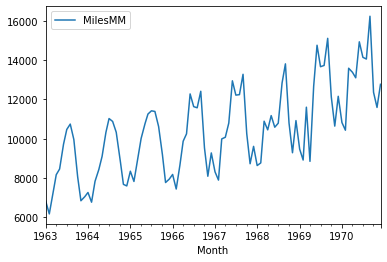

In [65]:
interpolated_miles.plot()

In [66]:
poly_interpolate = upsampled_miles.interpolate(method = "spline", order = 2)

In [67]:
poly_interpolate.head()

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6775.328886
1963-01-03,6725.739829
1963-01-04,6678.197709
1963-01-05,6632.702526


<AxesSubplot:xlabel='Month'>

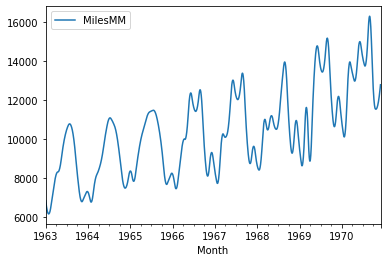

In [68]:
poly_interpolate.plot()

# Decomposition
### Aditive Decomposition 

##### y(t) = level + Trend + seasonality + Noise
### Multiplication Decomposition 
##### y(t) = level * Trend * seasonality * Noise

# Aditive Decomposition 

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
decompose_miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates=[0])

In [71]:
decompose_miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [72]:
decompose_miles_df.index = decompose_miles_df["Month"]

In [73]:
decompose_miles_df.head()

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462


In [74]:
result_additive = seasonal_decompose(decompose_miles_df["MilesMM"],model='additive')

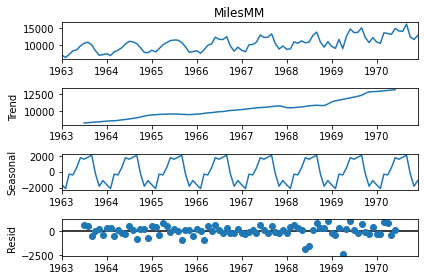

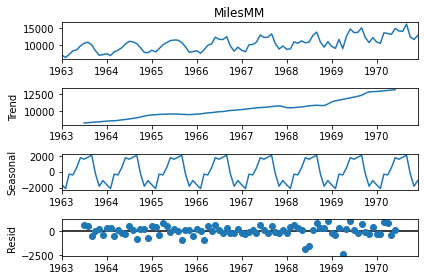

In [75]:
result_additive.plot()

In [76]:
result_multi = seasonal_decompose(decompose_miles_df["MilesMM"],model = "multiplicative")

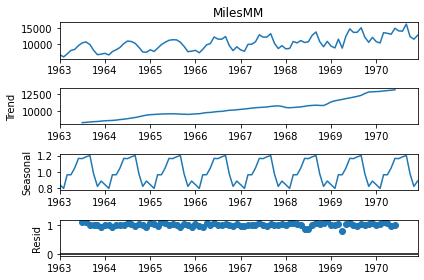

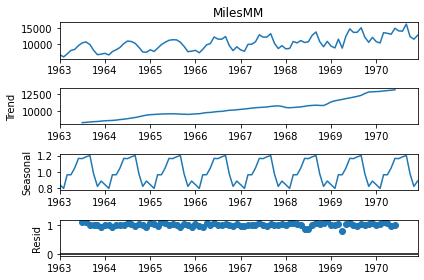

In [77]:
result_multi.plot()

## Differencing 

In [78]:
miles_df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header = 0, parse_dates=[0])

In [79]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [80]:
miles_df["Lag1"] = miles_df["MilesMM"].shift()

In [81]:
miles_df.head()

,Month,MilesMM,Lag1
0,1963-01-01,6827,NaN
1,1963-02-01,6178,6827.0
2,1963-03-01,7084,6178.0
3,1963-04-01,8162,7084.0
4,1963-05-01,8462,8162.0


In [82]:
miles_df["miles_diff"] = miles_df["MilesMM"].diff(periods = 1)

In [83]:
miles_df.head()

,Month,MilesMM,Lag1,miles_diff
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0


In [84]:
miles_df.index = miles_df["Month"]

In [85]:
miles_df.head()

,Month,MilesMM,Lag1,miles_diff
Month,,,,
1963-01-01,1963-01-01,6827,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0
1963-03-01,1963-03-01,7084,6178.0,906.0
1963-04-01,1963-04-01,8162,7084.0,1078.0
1963-05-01,1963-05-01,8462,8162.0,300.0


In [86]:
miles_dec_df = seasonal_decompose(miles_df["Month"], model = 'additive')

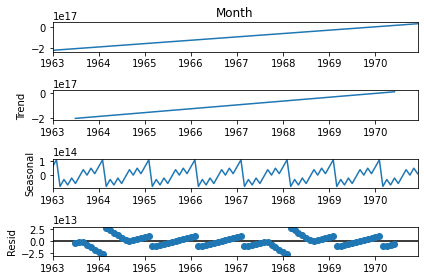

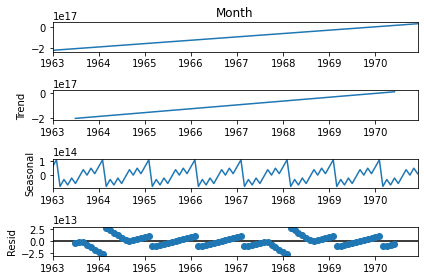

In [87]:
miles_dec_df.plot()

In [88]:
miles_multi_df = seasonal_decompose(miles_df.iloc[1:,3], model = "additive")

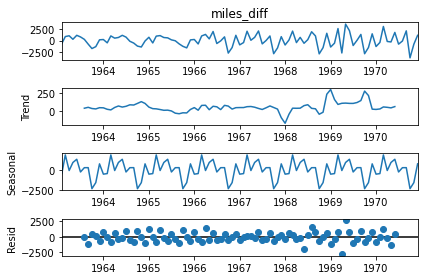

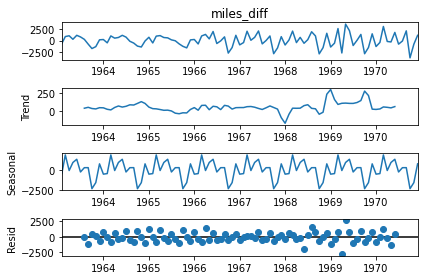

In [89]:
miles_multi_df.plot()

<AxesSubplot:xlabel='Month'>

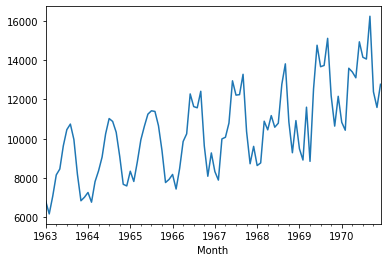

In [90]:
miles_df["MilesMM"].plot()

<AxesSubplot:xlabel='Month'>

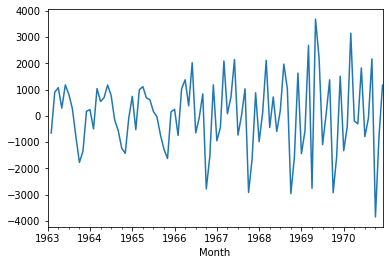

In [91]:
miles_df["miles_diff"].plot()

In [92]:
miles_df["miles_df_per_diff"] = miles_df["miles_diff"].diff(periods = 12)

In [93]:
miles_df.head()

,Month,MilesMM,Lag1,miles_diff,miles_df_per_diff
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN


<AxesSubplot:xlabel='Month'>

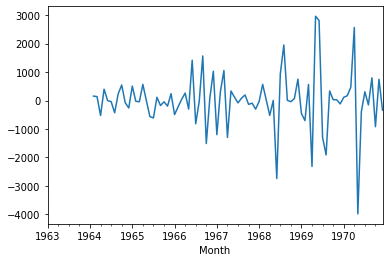

In [94]:
miles_df["miles_df_per_diff"].plot()

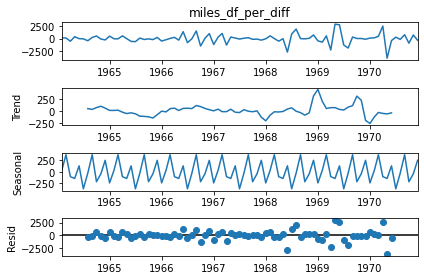

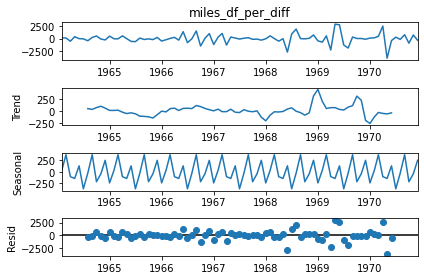

In [95]:
seasonal_decompose(miles_df.iloc[13:,4], model = "additive").plot()

In [96]:
temp_df = pd.read_csv("daily-min-temperatures.csv", header = 0, parse_dates=[0])

In [97]:
temp_df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [98]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [99]:
temp_df.shape

(3650, 2)

In [100]:
train_size = int(temp_df.shape[0]*0.8)

In [101]:
train_size

2920

In [102]:
train = temp_df[0:train_size]

In [103]:
train

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
2915,1988-12-26,9.5
2916,1988-12-27,12.9
2917,1988-12-28,12.9
2918,1988-12-29,14.8


In [104]:
test = temp_df[train_size:]

In [105]:
test

,Date,Temp
2920,1989-01-01,14.3
2921,1989-01-02,17.4
2922,1989-01-03,18.5
2923,1989-01-04,16.8
2924,1989-01-05,11.5
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [106]:
train.shape

(2920, 2)

## Naive(Persistance) Model 

In [107]:
temp_df = pd.read_csv("daily-min-temperatures.csv", header = 0, parse_dates=[0])

In [108]:
temp_df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [109]:
temp_df["T"] = temp_df["Temp"].shift(1)

In [110]:
temp_df

,Date,Temp,T
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
...,...,...,...
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5


In [111]:
train, test = temp_df[1:temp_df.shape[0]-7], temp_df[temp_df.shape[0]-7:]

In [112]:
train.shape

(3642, 3)

In [113]:
test.shape


(7, 3)

In [114]:
train

,Date,Temp,T
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8
...,...,...,...
3638,1990-12-20,15.4,14.7
3639,1990-12-21,13.1,15.4
3640,1990-12-22,13.2,13.1
3641,1990-12-23,13.9,13.2


In [115]:
train_x, train_y = train["T"], train["Temp"]

In [116]:
train_x

1       20.7
2       17.9
3       18.8
4       14.6
5       15.8
        ... 
3638    14.7
3639    15.4
3640    13.1
3641    13.2
3642    13.9
Name: T, Length: 3642, dtype: float64

In [117]:
train_y

1       17.9
2       18.8
3       14.6
4       15.8
5       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: Temp, Length: 3642, dtype: float64

In [118]:
test_x, test_y = test["T"], test["Temp"]

In [119]:
temp_df.tail(7)

,Date,Temp,T
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5
3649,1990-12-31,13.0,15.7


In [120]:
test_x

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: T, dtype: float64

In [121]:
test_y

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

## Walk Forward Validation 

In [122]:
predictions = test_x.copy()

In [123]:
print(predictions, test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: T, dtype: float64 3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [124]:
from sklearn.metrics import mean_squared_error

In [125]:
mse = mean_squared_error(test_y, predictions)

In [126]:
mse

3.4228571428571413

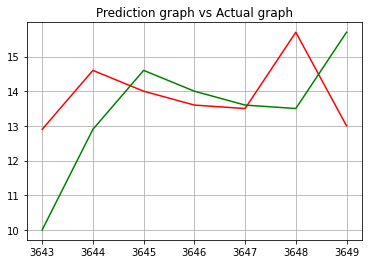

In [127]:
plt.plot(test_y, color = "r", label = "Testing data")
plt.plot(test_x, color = "green", label = "predicted data")
plt.title("Prediction graph vs Actual graph")
plt.grid()
plt.show()

## Auto Regression Model

In [128]:
temp = pd.read_csv("daily-min-temperatures.csv", header = 0, parse_dates=[0])

In [129]:
temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [130]:
temp["Lag"] = temp["Temp"].shift(1)

In [131]:
temp

,Date,Temp,Lag
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
...,...,...,...
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5


In [132]:
temp.shape[0]

3650

In [133]:
train, test = temp.Temp[:temp.shape[0]-7], temp.Temp[temp.shape[0]-7:]

In [134]:
train

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: Temp, Length: 3643, dtype: float64

In [135]:
test

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [136]:
from statsmodels.tsa.ar_model import AR

In [137]:
model = AR(train)

In [138]:
model_fit = model.fit()

## Number of Lag Variables

In [139]:
model_fit.k_ar

29

# Coefficient of lag varibles

In [140]:
model_fit.params

const       0.559773
L1.Temp     0.588662
L2.Temp    -0.090812
L3.Temp     0.048164
L4.Temp     0.039991
L5.Temp     0.039368
L6.Temp     0.025947
L7.Temp     0.044675
L8.Temp     0.013143
L9.Temp     0.037145
L10.Temp   -0.000641
L11.Temp    0.004939
L12.Temp    0.018024
L13.Temp    0.026961
L14.Temp    0.000623
L15.Temp    0.024457
L16.Temp    0.007353
L17.Temp    0.009925
L18.Temp    0.034385
L19.Temp   -0.009096
L20.Temp    0.024165
L21.Temp    0.018566
L22.Temp    0.012295
L23.Temp   -0.018518
L24.Temp   -0.001717
L25.Temp    0.016713
L26.Temp    0.019966
L27.Temp    0.009631
L28.Temp    0.006363
L29.Temp   -0.001566
dtype: float64

In [141]:
time_pred = model_fit.predict(start = len(train), end = len(train)+len(test)-1)

In [142]:
time_pred

3643    11.872160
3644    13.055704
3645    13.531810
3646    13.242590
3647    13.091564
3648    13.146082
3649    13.176492
dtype: float64

In [143]:
from sklearn.metrics import mean_squared_error

In [144]:
time_mse = mean_squared_error(test_y, time_pred)

In [145]:
time_mse

1.5012452323028904

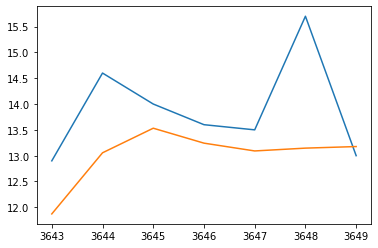

In [146]:
plt.plot(test_y)
plt.plot(time_pred)

## Walk For walidation(IN THE AUTO REGRESSION)

In [147]:
temp = pd.read_csv("daily-min-temperatures.csv", header = 0, parse_dates=[0])

In [148]:
temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [149]:
train, test = temp.Temp[:temp.shape[0]-7], temp.Temp[temp.shape[0]-7:]

In [150]:
train

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: Temp, Length: 3643, dtype: float64

In [151]:
test

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [152]:
data = train
predict = []

In [153]:
for t in test:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start = len(data), end = len(data)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)


11.872160209672327
13.662155108660127
14.351454133943065
13.430126346701647
13.374805342495133
13.477952837304949
14.768827717251568


In [154]:
predict

[11.872160209672327,
 13.662155108660127,
 14.351454133943065,
 13.430126346701647,
 13.374805342495133,
 13.477952837304949,
 14.768827717251568]

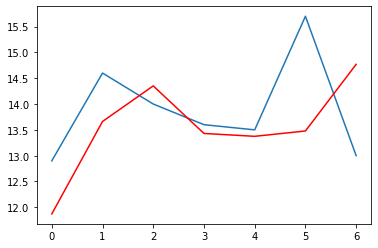

In [155]:
plt.plot(test.values)
plt.plot(predict, color = "red")

In [156]:
from sklearn.metrics import mean_squared_error

In [157]:
mse = mean_squared_error(test, predict)

In [158]:
mse

1.4529005042814302

# Moving Average Model  

In [159]:
df = pd.read_csv("daily-min-temperatures.csv", header = 0, parse_dates=[0])

In [160]:
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [161]:
df["lag"] = df["Temp"].shift(1)

In [162]:
df.head()

,Date,Temp,lag
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [163]:
df["Resid"] = df["Temp"] - df["lag"]

In [164]:
df

,Date,Temp,lag,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2
...,...,...,...,...
3645,1990-12-27,14.0,14.6,-0.6
3646,1990-12-28,13.6,14.0,-0.4
3647,1990-12-29,13.5,13.6,-0.1
3648,1990-12-30,15.7,13.5,2.2


In [165]:
train_r, test_r = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [166]:
train_r

1      -2.8
2       0.9
3      -4.2
4       1.2
5       0.0
       ... 
3638    0.7
3639   -2.3
3640    0.1
3641    0.7
3642   -3.9
Name: Resid, Length: 3642, dtype: float64

In [167]:
from statsmodels.tsa.ar_model import AR

In [168]:
model = AR(train_r)

In [169]:
model_r = model.fit()

In [170]:
model_r.k_ar

29

In [171]:
model_r.params

const       -0.006415
L1.Resid    -0.407139
L2.Resid    -0.496194
L3.Resid    -0.445747
L4.Resid    -0.403706
L5.Resid    -0.362528
L6.Resid    -0.334810
L7.Resid    -0.288468
L8.Resid    -0.274281
L9.Resid    -0.235333
L10.Resid   -0.234799
L11.Resid   -0.228532
L12.Resid   -0.208608
L13.Resid   -0.180324
L14.Resid   -0.178425
L15.Resid   -0.152265
L16.Resid   -0.143617
L17.Resid   -0.132501
L18.Resid   -0.097075
L19.Resid   -0.104927
L20.Resid   -0.079371
L21.Resid   -0.059348
L22.Resid   -0.045921
L23.Resid   -0.063197
L24.Resid   -0.063441
L25.Resid   -0.045061
L26.Resid   -0.023578
L27.Resid   -0.011882
L28.Resid   -0.003789
L29.Resid   -0.003422
dtype: float64

In [172]:
pre_Mov = model_r.predict(start = len(train_r), end =len(train_r)+len(test_r)-1)

In [173]:
pre_Mov

3643    2.004986
3644    1.264192
3645    0.510869
3646   -0.251687
3647   -0.122054
3648    0.077509
3649    0.055600
dtype: float64

In [174]:
from sklearn.metrics import mean_squared_error

In [175]:
moving_mse = mean_squared_error(test_r, pre_Mov)

In [176]:
moving_mse

2.0493985566482094

In [177]:
dost = df.lag[df.shape[0]-7:]

In [178]:
dost

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: lag, dtype: float64

In [179]:
predictions = dost + pre_Mov

In [180]:
predictions

3643    12.004986
3644    14.164192
3645    15.110869
3646    13.748313
3647    13.477946
3648    13.577509
3649    15.755600
dtype: float64

In [181]:
moving_mse_final = mean_squared_error(test_r, predictions)

In [182]:
moving_mse_final

191.38293418749882

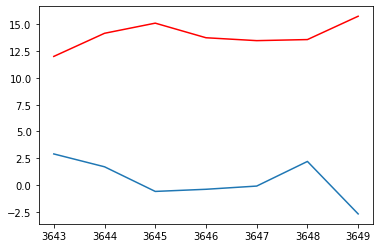

In [183]:
plt.plot(test_r)
plt.plot(predictions, color = 'red')

## ARIMA Model

In [184]:
data_samp = pd.read_csv("shampoo.csv", header=0)

In [185]:
data_samp

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


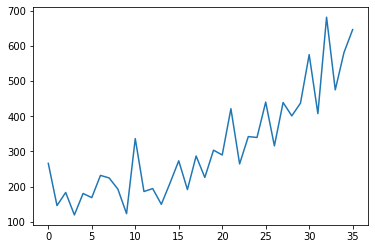

In [186]:
plt.plot(data_samp["Sales"])

#### From this graph we can see there is no seasonality in data 

In [187]:
data_samp.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [188]:
 data_samp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [189]:
 # Auto Correlation Plot

# Just see the graph of our data (Sales Data) and say which is line of trend in our data is it polynomial or linear trend if it is polynomial then you need to take d(D) value as 2, and if it is linear then D value will be 1

In [190]:
#in the case to remove the trend from the data 
#if the trend is polynomial we need to use 
#trend in polynomial
D = 2

In [191]:
from pandas.plotting import autocorrelation_plot

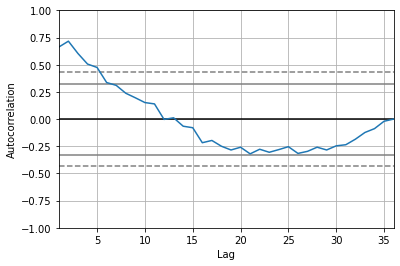

In [192]:
plot = autocorrelation_plot(data_samp["Sales"])

# After what lag value our confidence interval comes in picture with our lag value so in general we will take lag value less than the value just inter into the concept interval 

In [193]:
# p = 5 # As Curve is passing from the correlation value at 5 so

In [194]:
from statsmodels.graphics.tsaplots import plot_pacf

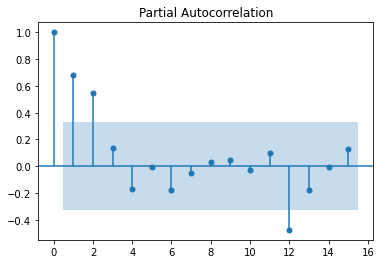

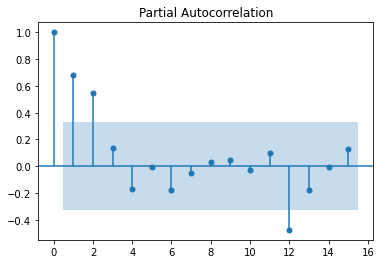

In [195]:
plot_pacf(data_samp["Sales"], lags=15)

# q = 2 # Value of Q is 2 

# After what lag value our confidence interval comes in picture with our lag value so in general we will take lag value less than the value just inter into the concept interval

In [196]:
from statsmodels.tsa.arima_model import ARIMA

# The order of Values P,Q,D is (p,d,q)

In [197]:
model = ARIMA(data_samp["Sales"], order=(5,2,2))

In [198]:
model_fit = model.fit()

c:\users\atulmaniraj15\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [199]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   34
Model:                 ARIMA(5, 2, 2)   Log Likelihood                -189.034
Method:                       css-mle   S.D. of innovations             54.350
Date:                Sat, 25 Sep 2021   AIC                            396.067
Time:                        23:41:48   BIC                            409.805
Sample:                             2   HQIC                           400.752
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9167      0.256      3.574      0.000       0.414       1.419
ar.L1.D2.Sales    -2.1873      0.184    -11.887      0.000      -2.548      -1.827
ar.L2.D2.Sales    -2.1231      0.405     -5.246      0.000      -2.916      -1.330
ar.L3.D2.Sales    -1.6014      0.478     -3.353      0.001      -2.537      -0.665
ar.L4.D2.Sales    -1.0320      0.409     -2.521      0.012      -1.834      -0.230
ar.L5.D2.Sales    -0.3195      0.193     -1.654      0.098      -0.698       0.059
ma.L1.D2.Sales    -0.0005      0.120     -0.004      0.997      -0.235       0.234
ma.L2.D2.Sales    -0.9995      0.119     -8.365      0.000      -1.234      -0.765
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.1410           -1.3029j            1.3105           -0.2328
AR.2            0.1410           +1.3029j            1.3105            0.2328
AR.3           -1.1312           -0.4228j            1.2077           -0.4431
AR.4           -1.1312           +0.4228j            1.2077            0.4431
AR.5           -1.2496           -0.0000j            1.2496           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0005           +0.0000j            1.0005            0.5000
-----------------------------------------------------------------------------
"""

In [200]:
Residuals = model_fit.resid

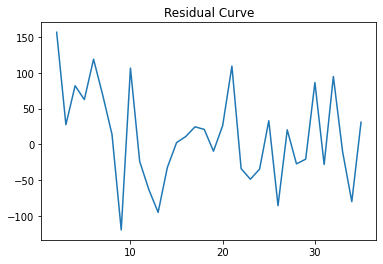

In [201]:
plt.plot(Residuals)
plt.title("Residual Curve")
plt.style.use("fivethirtyeight")
plt.show()

### From the Residual graph we can see there in no trend and No seasonality in the Data

In [202]:
Residuals.describe()

count     34.000000
mean      11.293670
std       65.989555
min     -119.281562
25%      -31.207759
50%       12.465523
75%       55.121646
max      156.383344
dtype: float64

In [203]:
Forcasting = model_fit.forecast()

In [204]:
Forcasting
# Here the first aray is the value 
# Here the second Array is standard deviation (Standard Deviation means our data must be having a this much standard deviation)
# Here the Third Array is 95% Confidence interval ( This means our forcasted values must be in this Interval)


(array([636.10646055]),
 array([54.34984598]),
 array([[529.58271986, 742.63020125]]))

In [205]:
data_samp

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [206]:
model_fit.forecast(5)

(array([636.10646055, 709.23072694, 664.27904961, 771.12484557,
        761.56335713]),
 array([54.34984598, 55.29957952, 57.45914558, 58.18655583, 60.27716284]),
 array([[529.58271986, 742.63020125],
        [600.84554272, 817.61591115],
        [551.6611937 , 776.89690553],
        [657.08129176, 885.16839937],
        [643.42228888, 879.70442538]]))

# We Can find the Auto Regression, Moving walk forward and ARIMA model just by the ARIMA model
##### VARIATION 
* **ARIMA** <br/>
 model = ARIMA(df["Sales"], order = (p,d,q)) <br/>
* **Auto Regression** <br/> 
model = ARIMA(df["Sales"], order = (p,d,0)) <br/>
* **Walk Forward Regession** <br/>
model = ARIMA(df["Sales"]. order = (0,d,q)) <br/>

In [207]:
walk = pd.read_csv("shampoo.csv", parse_dates=[0], header = 0)

In [208]:
walk

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [209]:
walk_train_size = int(walk.shape[0]*0.7)

In [210]:
walk_train_size

25

In [211]:
data.shape

(3650,)

In [212]:
train, test = walk.Sales[:walk_train_size], walk.Sales[walk_train_size:]

In [213]:
train

0     266.0
1     145.9
2     183.1
3     119.3
4     180.3
5     168.5
6     231.8
7     224.5
8     192.8
9     122.9
10    336.5
11    185.9
12    194.3
13    149.5
14    210.1
15    273.3
16    191.4
17    287.0
18    226.0
19    303.6
20    289.9
21    421.6
22    264.5
23    342.3
24    339.7
Name: Sales, dtype: float64

In [214]:
data = train
predict = []

In [215]:
for t in test:
    model = ARIMA(data , order = (5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data,t)
    data = pd.Series(data)

387.3762961636325
348.154220346833
386.3088258092844
356.0819998295003
446.3795452800704
394.73726940146594
434.91564555982444
507.923353326457
435.4830738685255
652.7437633791094
546.3434058688691


In [216]:
predict 

[387.3762961636325,
 348.154220346833,
 386.3088258092844,
 356.0819998295003,
 446.3795452800704,
 394.73726940146594,
 434.91564555982444,
 507.923353326457,
 435.4830738685255,
 652.7437633791094,
 546.3434058688691]

In [217]:
from sklearn.metrics import mean_squared_error
walk_mse = mean_squared_error(test.values, predict)

In [218]:
walk_mse

8119.129813831994

# SARIMA Model (Seasonal ARIMA Model)

   **SARIMA** or Seasonal ARIMA <br/>
   SARIMA(p,d,q)(P,D,Q)m (p,d,q) for Trend  And (P,D,Q)m for the Seasonal 
   * p -: Trend Autoregression order 
   * d -:  Trend Difference order
   * q -: Trend Moving order 
   
  **Seaonal Elements**
  
  There are four seasonal elements that are not part of ARIMA that must be configured, they are : 
   * P -: Seasonal Autoregressive order
   * D -: Seasonal difference order 
   * Q -: Seasonal Moving Average order 
   * m -: the number of time steps for a single seasonal periods


In [219]:
sarima = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv", header=0, parse_dates=[0])

In [220]:
sarima

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


In [221]:
sarima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    96 non-null     datetime64[ns]
 1   MilesMM  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


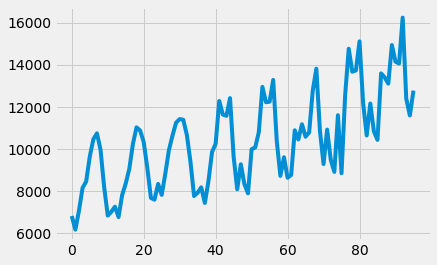

In [222]:
plt.plot(sarima["MilesMM"])

In [223]:
from pandas.plotting import autocorrelation_plot

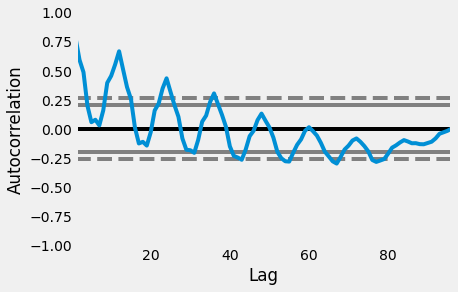

In [224]:
auto = autocorrelation_plot(sarima["MilesMM"])

In [225]:
sarima.index = sarima["Month"]

In [226]:
sarima

,Month,MilesMM
Month,,
1963-01-01,1963-01-01,6827
1963-02-01,1963-02-01,6178
1963-03-01,1963-03-01,7084
1963-04-01,1963-04-01,8162
1963-05-01,1963-05-01,8462
...,...,...
1970-08-01,1970-08-01,14057
1970-09-01,1970-09-01,16234
1970-10-01,1970-10-01,12389


In [227]:
sarimax = seasonal_decompose(sarima["MilesMM"], model = "multiplicative")

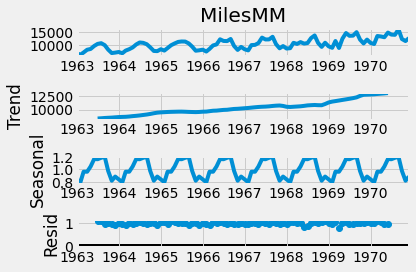

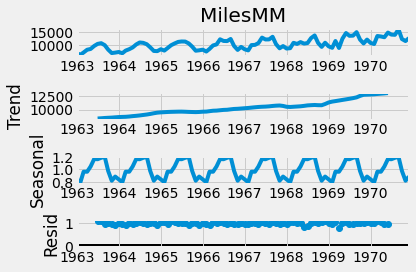

In [228]:
sarimax.plot()


**From this seasonal graph i can say there is large seasonality as we can see seasonal graph varies from 0.8 to  1.2 
so it is having a 0.4 seasonal which is huge amount for our data** .

**From the trend graph we can see clearly that there is linear Trend in our data**  